In [1]:
# Importing Necessary Libraries
import numpy as np
from numpy import genfromtxt


In [2]:
# Importing data and separating X & y variables
dt = genfromtxt("D3.csv", delimiter=",")
X = dt[:, 0:3]
y= dt[:, 3]
print(y[0:10])

[4.38754501 2.6796499  2.96848981 3.25406475 3.53637472 3.81541972
 4.09119974 2.36371479 3.83296487 4.09894997]


In [3]:
# Multivariate Linear Regression using Gradient Descent
def LinReg_with_gradient_descent(X, y, alpha, epoch):
  m = X.shape[0]  # number of samples
  ones =np.ones((m,1))  
  X = np.concatenate((ones, X), axis=1)   # Nuw X with X0's =1
  n = X.shape[1]   # 
  Theta = np.ones(n)    # n= 4  parameter initialization
  h = np.dot(X, Theta)   # Compute hypothesis

  # Gradient descent algorithm
  cost = np.ones(epoch)
  for i in range (0, epoch):
    Theta[0] = Theta[0] - (alpha / X.shape[0]) * sum(h-y)
    for j in range(1, n):
      Theta[j]= Theta[j] - (alpha/ X.shape[0]) * sum((h-y) * X[:, j])
    h  = np.dot(X, Theta)
    cost[i] = 1/(2*m) * sum(np.square(h-y))  # Compute Cost
  return cost, Theta


In [4]:
# Calculating theta and cost
cost, theta = LinReg_with_gradient_descent(X, y, 0.1, 2000)
print(theta)

[ 5.31416716 -2.00371927  0.53256334 -0.26560186]


In [9]:
from matplotlib import pyplot as plt

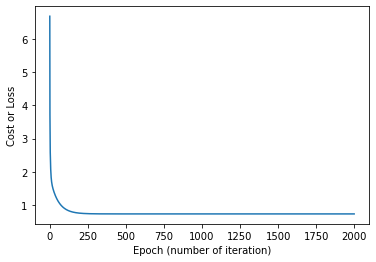

Lowest cost =0.7384642415682937
 Cost after 2000 iterations = 0.7384642415682943


In [10]:
# Checking out the loss or cost plot
plt.plot(cost)
plt.xlabel("Epoch (number of iteration)")
plt.ylabel( "Cost or Loss")
plt.show()
print("Lowest cost =" + str(np.min(cost)))
print(" Cost after 2000 iterations = " + str(cost[-1]))

In [11]:
X_predict_1= np.array([1, 2,0,4])
y_predict_1= np.dot(X_predict_1, theta)
print(y_predict_1)

0.2443211716166045


In [12]:
#Predictions for the new values using the model
X_predict_1=np.array([1,1,1])
X_predict_2=np.array([2,0,4])
X_predict_3=np.array([3,2,1])

#Predictions
X_predict_1 = np.concatenate(([1], X_predict_1), axis = 0) # Adding one colum of one in the beggining
y_predict_1=np.dot(theta, X_predict_1)
print("Prediction for (1,1,1) = " + str(y_predict_1))

X_predict_2 = np.concatenate(([1], X_predict_2), axis = 0) # Adding one colum of one in the beggining
y_predict_2=np.dot(theta, X_predict_2)
print("Prediction for (2,0,4) = " + str(y_predict_2))

X_predict_3 = np.concatenate(([1], X_predict_3), axis = 0) # Adding one colum of one in the beggining
y_predict_3=np.dot(theta, X_predict_3)
print("Prediction for (3,2,1) = " + str(y_predict_3))

Prediction for (1,1,1) = 3.577409369212849
Prediction for (2,0,4) = 0.2443211716166045
Prediction for (3,2,1) = 0.10253417197052594


#Validating the model using Built-in Linear Regression Function

In [13]:
from sklearn import linear_model  # Importing linear model
lm = linear_model.LinearRegression()   # Linear regression
lm.fit(X, y)           # Fitting the data

LinearRegression()

In [14]:
# Printing the thetas (intercept and coefs)
print(lm.intercept_, lm.coef_)
# print(lm.coef_)

#Predictions
X_predict_1=np.array([[1,1,1]])
X_predict_2=np.array([[2,0,4]])
X_predict_3=np.array([[3,2,1]])
print("Prediction for (1,1,1) = " + str(lm.predict(X_predict_1)))
print("Prediction for (2,0,4) = " + str(lm.predict(X_predict_2)))
print("Prediction for (3,2,1) = " + str(lm.predict(X_predict_3)))

5.3141671724569814 [-2.00371927  0.53256334 -0.26560187]
Prediction for (1,1,1) = [3.57740937]
Prediction for (2,0,4) = [0.24432117]
Prediction for (3,2,1) = [0.10253417]
